AirBnb
The goal of this project is to predict Airbnb's users first location that is booked using user demographic and activity information. This is actually a kaggle competition, so the data is taken from there. The features that will be reviewed for validity in the prediction will be demographic data, timestamp activity on the website, devices used, browsers, affiliate information, language preferences. I will expand on this goal by also trying to predict the amount of 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [3]:
loc = r"C:\Users\user\Desktop\kagglehelp\airbnb"
tr_users=pd.read_csv(loc+"\\train_users_2.csv")

In [8]:
tr_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
x_cols=[i for i in tr_users.columns.values[4:-1]]

    

In [6]:
# Columns that need to be encoded 
cols_enc=['gender', 'signup_method', 'language', 'affiliate_channel',
          'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
          'first_device_type', 'first_browser' ]

y_enc='country_destination'


In [19]:
# transform label type columns for usability in pandas
tr_users.dtypes
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
# Label encoder applies a numeric label. inverse_transform - transforms it back
# tr_users=tr_users.apply(LabelEncoder().fit_transform)

# Encodes all columns and creates a seperate encoding function for each
enc_lib={}
tr_users_adj=tr_users.copy(deep=True)
# Label encode
for i in tr_users[cols_enc]:
    enc_lib[i]=LabelEncoder()
    tr_users_adj[i]=LabelEncoder().fit_transform(tr_users[i])
    
# One hot encode, then transform into dataframe to join to training dataset
enc_onehot=OneHotEncoder()
tr_users_onehot=enc_onehot.fit_transform(tr_users_adj[cols_enc])
cols=[cols_enc[i]+'_'+str(j) for i in range(0,len(cols_enc)) for j in range(0, enc_onehot.n_values_[i])]
# print cols
tr_users_onehot=pd.DataFrame(tr_users_onehot.toarray(), columns=cols)

train=tr_users.drop(cols_enc,1).copy(deep=True)
train[cols]=tr_users_onehot[cols]

In [21]:

train["date_account_created"]=pd.to_datetime(tr_users_adj["date_account_created"])
train["date_first_booking"]=pd.to_datetime(tr_users_adj["date_first_booking"])
train["month_created"]=pd.to_datetime(tr_users_adj["date_account_created"]).dt.month
train["year_created"]=pd.to_datetime(tr_users_adj.date_account_created).dt.year
train.dtypes

id                                object
date_account_created      datetime64[ns]
timestamp_first_active             int64
date_first_booking        datetime64[ns]
age                              float64
signup_flow                        int64
country_destination               object
gender_0                         float64
gender_1                         float64
gender_2                         float64
gender_3                         float64
signup_method_0                  float64
signup_method_1                  float64
signup_method_2                  float64
language_0                       float64
language_1                       float64
language_2                       float64
language_3                       float64
language_4                       float64
language_5                       float64
language_6                       float64
language_7                       float64
language_8                       float64
language_9                       float64
language_10     

In [12]:
for k,v in tr_users_plt.age.iteritems():
#     print k
    if tr_users_plt['age'][k]>100:
        tr_users_plt.loc[k,'age']=np.NaN
    if k % 10000 == 0:
        print k
#         print tr_users_plt['age'][k]
        
#     tr_users_plt['age'>100]=np.nan


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000


In [20]:
# export the new ages
import csv
with open(loc+'\\ages.csv', 'wb') as f:
    writer=csv.writer(f)
    writer.writerow(['Age'])
    for i in tr_users_plt.age:
        writer.writerow([str(i)])
    

In [22]:
ages=pd.read_csv(loc+'\\ages.csv')
ages.head()
for k,v in ages['Age'].iteritems():
    if pd.isnull(ages.Age[k]):
        ages.loc[k, 'Age']=0

ages.Age[0]
train['age']=ages['Age']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011005898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000004FC2B198>]], dtype=object)

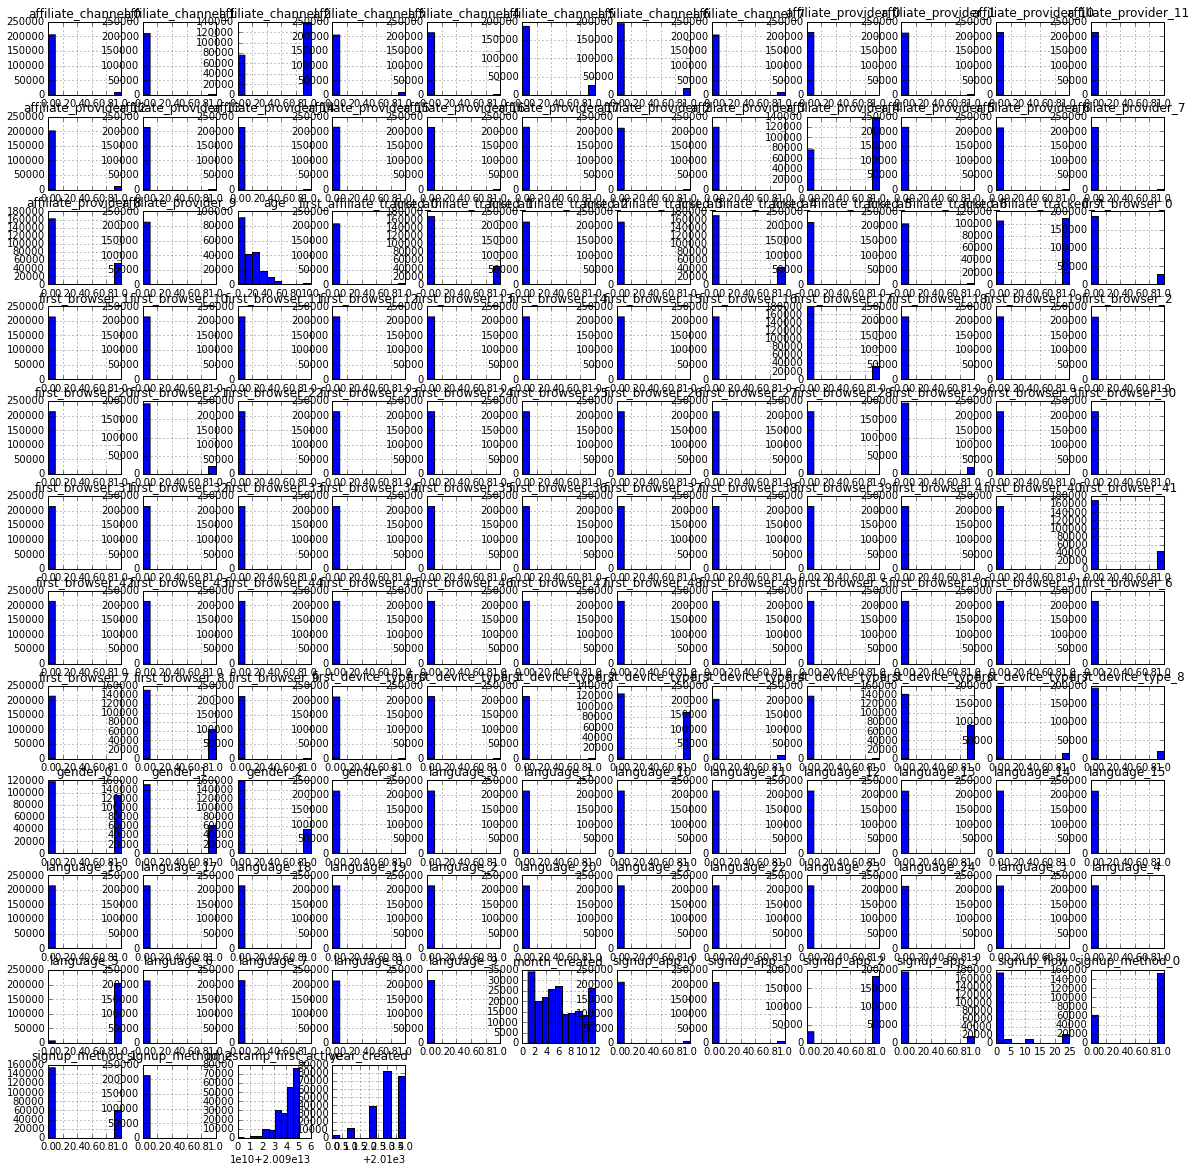

In [23]:
%matplotlib inline
train.hist(figsize=(20,20))

In [25]:
train.columns

Index([u'id', u'date_account_created', u'timestamp_first_active',
       u'date_first_booking', u'age', u'signup_flow', u'country_destination',
       u'gender_0', u'gender_1', u'gender_2',
       ...
       u'first_browser_44', u'first_browser_45', u'first_browser_46',
       u'first_browser_47', u'first_browser_48', u'first_browser_49',
       u'first_browser_50', u'first_browser_51', u'month_created',
       u'year_created'],
      dtype='object', length=140)

In [30]:
# split the data into arrays
# use train_test_split
# call classifier
# fit classifier
# score classifier

# note train_test_split takes only arrays
from sklearn.cross_validation import train_test_split

# reorder tr_users_adj
reorder_col=[col for col in train if col not in ['country_destination', 'date_first_booking']]+['date_first_booking', 'country_destination']
train=train[reorder_col]



# split x and y data 
y=train.values[:,-1]
X=train.values[:,2:-3]
y=np.array(y).tolist()
X=np.array(X).tolist()
# print y[:20]
# print X[:5]
reorder_col[2:]




['timestamp_first_active',
 'age',
 'signup_flow',
 'gender_0',
 'gender_1',
 'gender_2',
 'gender_3',
 'signup_method_0',
 'signup_method_1',
 'signup_method_2',
 'language_0',
 'language_1',
 'language_2',
 'language_3',
 'language_4',
 'language_5',
 'language_6',
 'language_7',
 'language_8',
 'language_9',
 'language_10',
 'language_11',
 'language_12',
 'language_13',
 'language_14',
 'language_15',
 'language_16',
 'language_17',
 'language_18',
 'language_19',
 'language_20',
 'language_21',
 'language_22',
 'language_23',
 'language_24',
 'affiliate_channel_0',
 'affiliate_channel_1',
 'affiliate_channel_2',
 'affiliate_channel_3',
 'affiliate_channel_4',
 'affiliate_channel_5',
 'affiliate_channel_6',
 'affiliate_channel_7',
 'affiliate_provider_0',
 'affiliate_provider_1',
 'affiliate_provider_2',
 'affiliate_provider_3',
 'affiliate_provider_4',
 'affiliate_provider_5',
 'affiliate_provider_6',
 'affiliate_provider_7',
 'affiliate_provider_8',
 'affiliate_provider_9',
 'aff

In [31]:
tr_users_adj.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,0,NaN,1,0,5,2,4,7,2,3,8,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,2,38,1,0,5,7,8,7,2,3,8,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,1,56,0,3,5,2,4,7,2,6,21,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,1,42,1,0,5,2,4,7,2,3,17,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,0,41,0,0,5,2,4,7,2,3,8,US


In [32]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=0)

In [33]:
y_train

['NDF',
 'NDF',
 'NDF',
 'GB',
 'NDF',
 'US',
 'NDF',
 'US',
 'DE',
 'US',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'US',
 'other',
 'US',
 'NDF',
 'NDF',
 'FR',
 'NDF',
 'NDF',
 'US',
 'other',
 'US',
 'US',
 'US',
 'IT',
 'US',
 'US',
 'other',
 'NDF',
 'NDF',
 'NDF',
 'US',
 'NDF',
 'NDF',
 'NDF',
 'IT',
 'US',
 'GB',
 'GB',
 'NDF',
 'US',
 'NDF',
 'NDF',
 'NDF',
 'other',
 'IT',
 'NDF',
 'CA',
 'US',
 'US',
 'NDF',
 'US',
 'NDF',
 'NDF',
 'NDF',
 'US',
 'US',
 'NDF',
 'US',
 'NDF',
 'US',
 'CA',
 'AU',
 'US',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'US',
 'NDF',
 'NDF',
 'US',
 'NDF',
 'other',
 'US',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'US',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'US',
 'NDF',
 'FR',
 'US',
 'US',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'US',
 'US',
 'NDF',
 'US',
 'NDF',
 'US',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'other',
 'other',
 'NDF',
 'NDF',
 'NDF',
 'NDF',
 'US',
 'NDF',
 'NDF',
 'NDF',
 'other',
 'CA',
 'US',
 'US',
 'NDF',
 'NDF',
 

In [34]:
# fit the naive bayes model
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train, y_train)

# predict from the model
# pred=clf.predict(X_test)

# mean accuracy on test data and labels
clf.score(X_test,y_test)

0.0041226488018551921

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf2=RandomForestClassifier()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.56351455810358153

In [33]:
# import the test data

test=pd.read_csv(loc+'//test_users.csv')
testtest.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [47]:
enc_lib['gender'].classes_
enc_lib['first_browser'].classes_


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51], dtype=int64)

In [43]:
test_adj=test
# for i in test[cols_enc]:
cols_enc2=['gender', 'signup_method']
for i in test[cols_enc2]:
    print i
    test_adj[i]=enc_lib[i].transform(test[i])
# test_adj.head()

gender


ValueError: y contains new labels: [<bound method LabelEncoder.transform of LabelEncoder()>]

In [31]:
from pandas.tools.plotting import scatter_matrix
# columns to use


# scat=scatter_matrix(tr_users_adj[cols_enc], figsize=(8,8))

ERROR! Session/line number was not unique in database. History logging moved to new session 88


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002B6AB390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002C2EDF98>]], dtype=object)

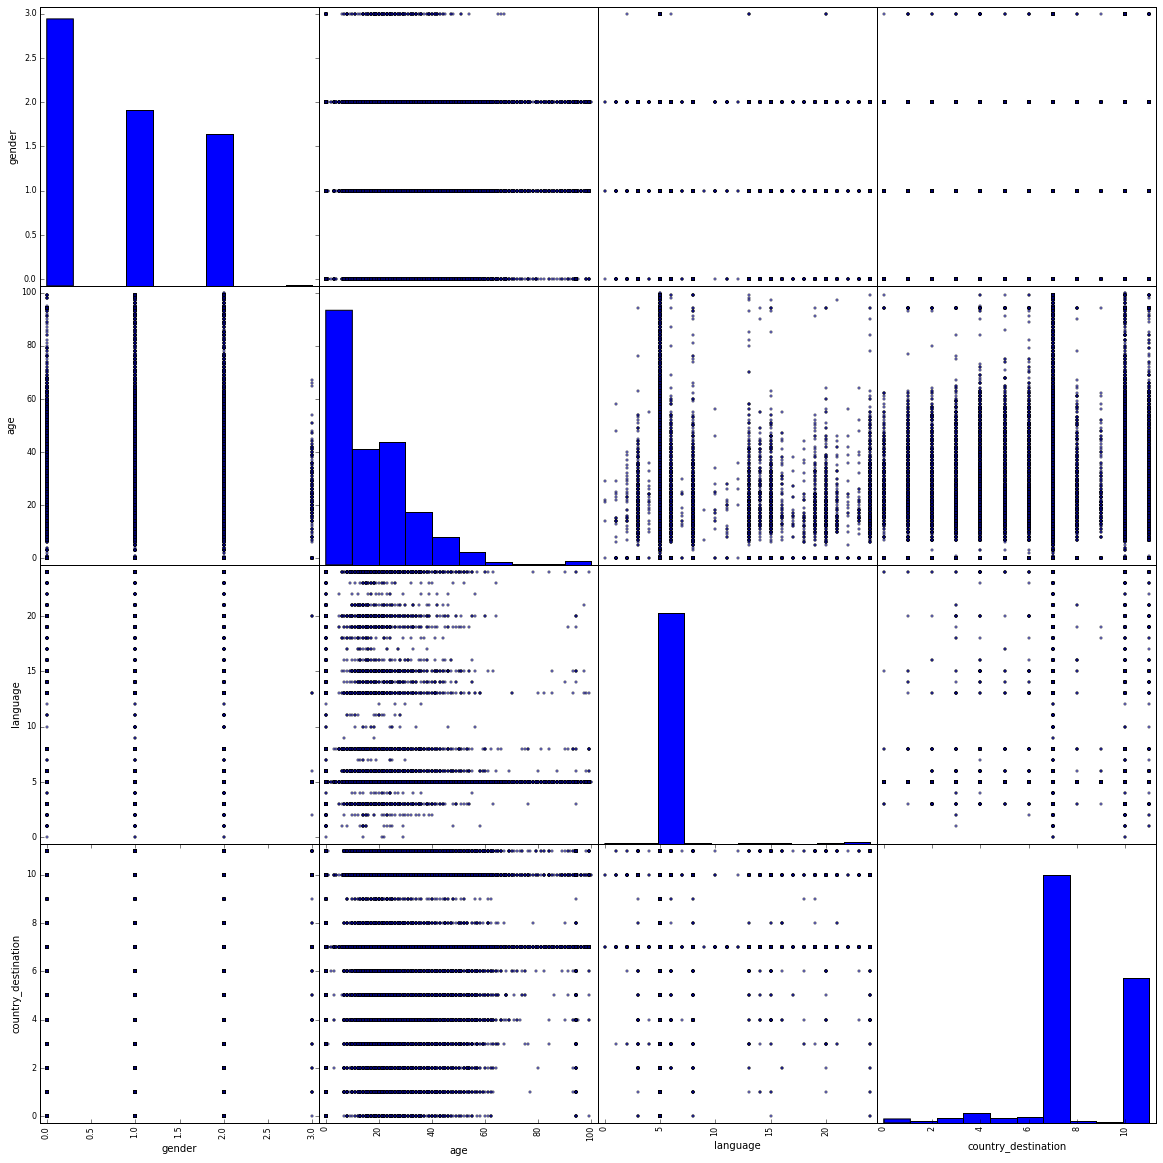

In [32]:
%matplotlib inline

scat=scatter_matrix(tr_users_adj[['gender', 'age', 'language', 'country_destination']],
                   figsize=(20,20))

scat

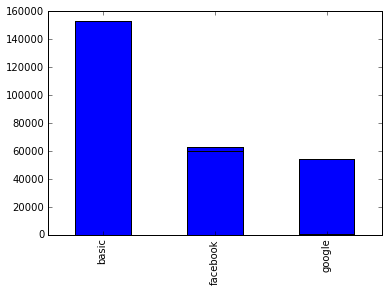

In [81]:
tr_users.gender.value_counts()

# plt.figure(1)
# plt.subplot(211)
# plt.title('gender')
p1=tr_users.gender.value_counts().plot(kind='bar')
# p1.xticks(range(len(tr_users.gender.values())), tr_users.gender.values(), rotation=90)
# plt.subplot(212)
p2=tr_users.signup_method.value_counts().plot(kind='bar')


In [ ]:
lang_count_plt=plt()
